In [100]:
from arcgis.gis import GIS

In [101]:
gis = GIS("https://www.arcgis.com", "username", "password")

In [102]:
sf_map = gis.map("San Francisco")

In [103]:
sf_map

<Item title:"SF_Parks" type:Service Definition owner:arcpybook>
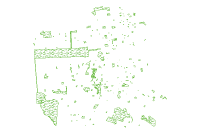

<Item title:"SF_Openspace" type:Service Definition owner:arcpybook>
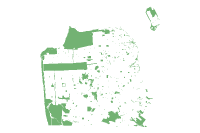

<Item title:"SF_Parks" type:Feature Service owner:arcpybook>
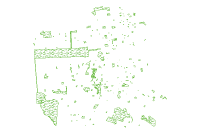

<Item title:"SF_BusStops" type:Feature Service owner:arcpybook>
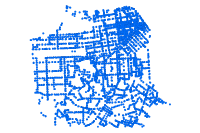

<Item title:"SF_Neignborhoods" type:Service Definition owner:arcpybook>
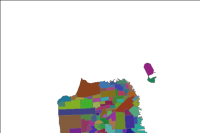

<Item title:"SF_Buildings" type:Service Definition owner:arcpybook>
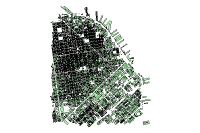

<Item title:"SF_Openspace" type:Feature Service owner:arcpybook>
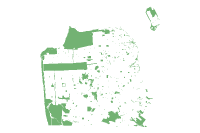

<Item title:"SF_Neignborhoods" type:Map Service owner:arcpybook>
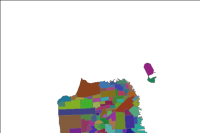

<Item title:"SF_Buildings" type:Feature Service owner:arcpybook>
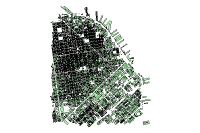

<Item title:"SF_BusStops" type:Service Definition owner:arcpybook>
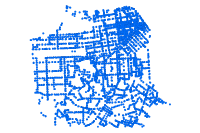

In [104]:
from IPython.display import display

items = gis.content.search('SF')
for item in items:
    display(item)

In [105]:
add_item = [bus_item for bus_item in items if bus_item.title == "SF_BusStops"]
sf_map.add_layer(add_item[0])

In [106]:
import pandas as pd
dataFrame = pd.read_csv("C:\PythonBook\ch12_ArcGIS_PythonAPI\Ch12_Data\SFPD_2016.csv", encoding = "ISO-8859-1")
dataFrame

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,Location,PdId
0,160000318,ROBBERY,ATTEMPTED ROBBERY WITH BODILY FORCE,Friday,1/1/2016 0:00,1:10,TENDERLOIN,NONE,300 Block of TAYLOR ST,-122.411303,37.785536,"(37.7855355791102, -122.411302813025)",1.600000e+13
1,160002988,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,1/1/2016 0:00,18:30,SOUTHERN,NONE,HOWARD ST / 5TH ST,-122.404934,37.781499,"(37.7814987213218, -122.404934413339)",1.600000e+13
2,160004138,OTHER OFFENSES,RESISTING ARREST,Saturday,1/2/2016 0:00,13:55,SOUTHERN,NONE,600 Block of MARKET ST,-122.401655,37.788905,"(37.7889048945911, -122.401655040432)",1.600000e+13
3,160008754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,1/4/2016 0:00,10:50,RICHMOND,NONE,5300 Block of GEARY BL,-122.476719,37.780580,"(37.7805797943167, -122.476719025527)",1.600000e+13
4,160034975,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,1/13/2016 0:00,13:30,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",1.600000e+13
5,160011218,MISSING PERSON,MISSING ADULT,Monday,1/4/2016 0:00,16:00,PARK,NONE,0 Block of SHRADER ST,-122.452840,37.774515,"(37.7745145380854, -122.452839772389)",1.600000e+13
6,160019626,BURGLARY,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",Friday,1/8/2016 0:00,4:10,TARAVAL,NONE,0 Block of MARGARET AV,-122.452188,37.718019,"(37.7180189135392, -122.452187573593)",1.600000e+13
7,160011133,VEHICLE THEFT,STOLEN TRUCK,Tuesday,1/5/2016 0:00,1:30,SOUTHERN,NONE,KISSLING ST / 11TH ST,-122.415003,37.772650,"(37.772649875548, -122.415002640244)",1.600000e+13
8,160016860,ASSAULT,BATTERY,Thursday,1/7/2016 0:00,9:35,PARK,"ARREST, BOOKED",COLE ST / CARL ST,-122.449958,37.765800,"(37.7658000842584, -122.449958075249)",1.600000e+13
9,160016860,WARRANTS,WARRANT ARREST,Thursday,1/7/2016 0:00,9:35,PARK,"ARREST, BOOKED",COLE ST / CARL ST,-122.449958,37.765800,"(37.7658000842584, -122.449958075249)",1.600000e+13


In [107]:
dataFrame['PdDistrict'].describe()

count         4999
unique          10
top       SOUTHERN
freq           981
Name: PdDistrict, dtype: object

In [114]:
import matplotlib.pyplot as py_plot

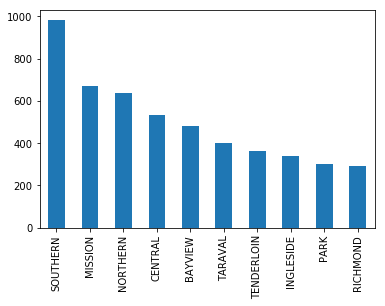

In [128]:
dataFrame['PdDistrict'].value_counts().plot(kind='bar')

<Item title:"SFPD calls for 2016" type:CSV owner:arcpybook>
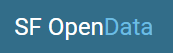

In [111]:
pd_data = r"C:\PythonBook\ch12_ArcGIS_PythonAPI\Ch12_Data\SFPD_2016.csv"
pd_data_properties = {'title': 'SFPD calls for 2016',
                             'description': 'All the SFPD calls for the year 2016',
                             'tags': 'SF PD, calls, csv' }

thumbnail_pic = r"C:\PythonBook\ch12_ArcGIS_PythonAPI\Ch12_Data\SF_PD.PNG"

sf_pd_item = gis.content.add(item_properties=pd_data_properties, data=pd_data,
                            thumbnail = thumbnail_pic)

sf_pd_item

<Item title:"SFPD calls for 2016" type:Feature Service owner:arcpybook>
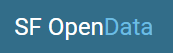

In [112]:
sf_pd_feature_layer = sf_pd_item.publish()
sf_pd_feature_layer

In [113]:
sf_crimemap = gis.map("Divisadero and Haight,San Francisco", zoomlevel=17)
sf_crimemap.add_layer(sf_pd_feature_layer)
sf_crimemap.height = '950px'
sf_crimemap